<a href="https://colab.research.google.com/github/anpaure/cp_eval/blob/main/cp_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Competitive programming eval


Problems are taken from Kazakhstan's 2024 regional and national informatics olympiads. This selection is a good choice because the problems are relatively new, originally available only in Russian, and unlikely to have been crawled online since they are shared exclusively in a private group. Moreover, no public editorials or solutions exist, so no overfitting. Problems are sorted by difficulty groups, A is the easiest, B is slightly harder, C is the hardest. <br>

The results are obtained by prompting 5 SOTA models (deepseek-r1-lite-preview, chatgpt-4o-latest-20241120, claude-3-5-sonnet-20241022, o1-mini, qwq-32b-preview) with: "You are a competitive programming grandmaster. Solve the following programming problem." followed by the problem statement. <br>

Some prompts were re-run a couple of times if the model failed to write a solution that earned points. In case a model generally gets the idea but makes a bug somewhere, It was told "You have an error somewhere, debug your code." without any additional pointers. <br>

Essentially, the goal wasn't to conduct a perfect experiment, but rather squeeze the most out of models without any advanced prompting or RAG. The code probably won't execute correctly in the notebook, that's because LLMs generate weird code. I could change that, but I decided to keep the raw code instead.



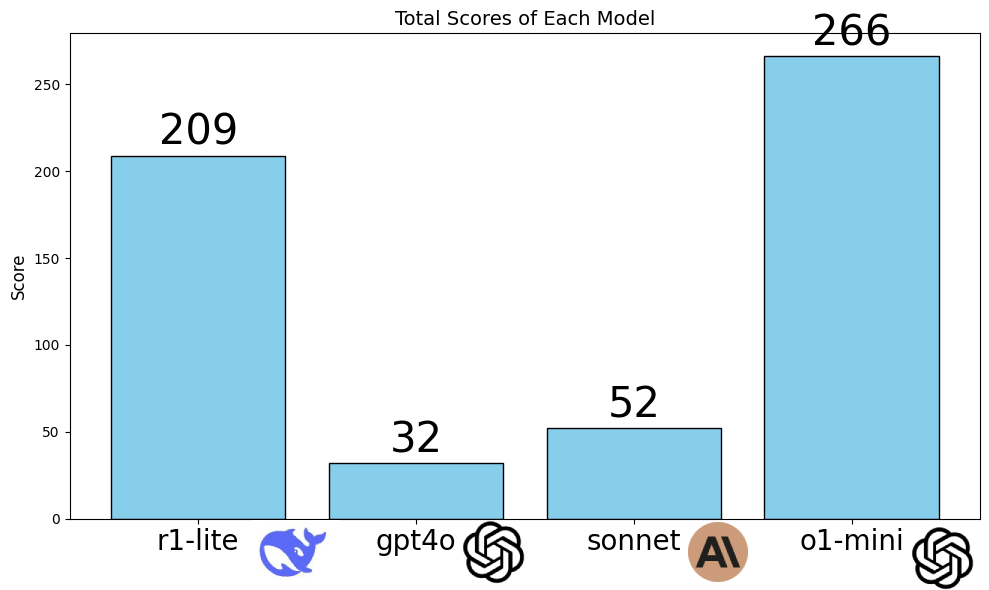

##How do you interpret these results?
It's a good question, and the truth is that it's more difficult than just looking at the scores due to the nature of competitive programming problems. They're not exact answer problems, and for that reason there are many solutions that are *almost* correct, but fall short and get 0 points because of some silly bug. I tried to mitigate this problem to some extent by asking models to debug *close enough* solutions, but it's also a skill that models must learn.

Roughly speaking, if we compare the results with humans', I'd say that with no guidance, like here, o1 and r1 could advance to the national stage but miss the bronze medal by a bit or maybe just slightly. However, if we have a human in the loop actively exchanging ideas with an LLM, they could do a lot more, definitely bronze, maybe silver medal.

Below each problem I provide a brief breakdown of how the models did, since it's probably really difficult to most people not involved with competitive programming.




### A1
<details>
  <summary>Statement</summary>


  You have `n` (1 ≤ n ≤ 10<sup>5</sup>) balls of different colors. The color of the `i`-th ball (1 ≤ i ≤ n) is given by one integer `a[i]`. You need to put these balls into boxes. All balls in one box must be of the same color, with the exception of **one ball** that can have an arbitrary color.

For example:
- You can put balls with colors `[2, 2, 2]` or `[3, 3, 5, 3]` in one box.
- You **cannot** put balls with colors `[5, 5, 6, 6]` in one box.

**Objective**: Print the minimum number of boxes required.

---

### Input Format:
- The first line contains one integer `n`, the number of balls.
- The second line contains `n` integers, the colors of all balls.

---

### Output Format:
- Print one integer: the minimum number of boxes required.

---

### Examples:

#### Input 1:
3 2 2 2

#### Output 1:
1

#### Input 2:
3 3 1 2

#### Output 2:
2

#### Input 3:
6 5 3 2 5 4 5

#### Output 3:
2


</details>

<details>
<summary>Breakdown</summary>


Here, r1-lite and o1-mini pull ahead by actually solving the problem properly, and 4o alongside Sonnet mistakenly convince themselves that they've understood the problem completely and solved it, so they prematurely code a solution that doesn't actually work, can't really help them. QwQ struggles and comes up with a solution that works on sample test cases and some subtasks, but doesn't work in general so it gets 50 points.

</details>

In [ ]:
# @title r1-lite: 100 points {"display-mode":"form"}
def min_boxes(n, colors):
    from collections import Counter
    freq = Counter(colors)
    freq_values = sorted(freq.values(), reverse=True)
    left = 1
    right = len(freq)
    result = freq_values[0]

    while left <= right:
        mid = (left + right) // 2
        # Assign top mid frequencies as main colors
        main_balls = sum(freq_values[:mid])
        # Total balls that can be exceptions
        exceptions_available = mid
        # Total exception balls is n - main_balls
        exceptions_needed = n - main_balls
        if exceptions_needed <= exceptions_available:
            result = mid
            right = mid - 1
        else:
            left = mid + 1
    return result

# Read input
n = int(input())
colors = list(map(int, input().split()))
print(min_boxes(n, colors))

In [ ]:
# @title gpt4o: 0 points {"display-mode":"form"}
from collections import Counter

def min_boxes(n, colors):
    # Count the frequency of each color
    freq = Counter(colors)

    # Find the maximum frequency of any single color
    max_count = max(freq.values())

    # Count the number of colors
    distinct_colors = len(freq)

    # To minimize the number of boxes, we calculate:
    return max(max_count, distinct_colors)

# Input Reading
n = int(input())
colors = list(map(int, input().split()))

# Output the result
print(min_boxes(n, colors))



In [ ]:
# @title sonnet: 0 points {"display-mode":"form"}
def solve():
    # Read input
    n = int(input())
    a = list(map(int, input().split()))

    # Count frequency of each color
    freq = {}
    for x in a:
        freq[x] = freq.get(x, 0) + 1

    # Get list of frequencies in descending order
    counts = sorted(freq.values(), reverse=True)

    # If there's only one color or no balls, need only one box
    if len(counts) <= 1:
        return 1

    # Initialize result with putting each color in separate boxes
    result = len(freq)

    # Try to combine different colors
    extra = 0  # number of single balls we can use
    for i in range(len(counts)):
        if counts[i] == 1:
            extra += 1
        else:
            # For each group of same-colored balls (size > 1),
            # we can use one different colored ball
            extra -= 1

    # Update result: we can reduce the number of boxes by the number
    # of single balls we can use (but not below the number needed for
    # the largest color group)
    result = max(len(freq) - max(0, extra), 1)

    return result

# Print result
print(solve())


In [ ]:
# @title o1-mini: 100 points {"display-mode":"form"}
def min_boxes(n, colors):
    from collections import Counter

    freq = list(Counter(colors).values())
    freq.sort(reverse=True)
    prefix_sum = [0] * (len(freq) +1)
    for i in range(len(freq)):
        prefix_sum[i+1] = prefix_sum[i] + freq[i]

    left = 1
    right = len(freq)
    answer = len(freq)

    while left <= right:
        mid = (left + right) //2
        if prefix_sum[mid] >= n - mid:
            answer = mid
            right = mid -1
        else:
            left = mid +1
    return answer

# Read input
import sys

def main():
    import sys
    input = sys.stdin.read
    data = input().split()
    n = int(data[0])
    colors = list(map(int, data[1:n+1]))
    print(min_boxes(n, colors))

if __name__ == "__main__":
    main()


In [ ]:
# @title qwq: 50 points {"display-mode":"form"}
from collections import Counter

def main():
    import sys
    input = sys.stdin.read
    data = input().split()
    n = int(data[0])
    colors = list(map(int, data[1:n+1]))

    freq = Counter(colors)
    max_freq = max(freq.values())

    boxes = (n + max_freq) // (max_freq + 1)
    print(boxes)

if __name__ == "__main__":
    main()


### A2
<details>
  <summary>Statement</summary>
  
You are given a number `k` (1 ≤ k ≤ n), and a permutation of length `n` (2 ≤ n ≤ 2 × 10<sup>5</sup>). You should perform `m` (0 ≤ m ≤ n) operations. In a single operation, you can choose between two options:

1. **Remove simultaneously every element `i`** (2 ≤ i ≤ n - 1) that is greater than both its neighbors (`a[i - 1] < a[i] > a[i + 1]`).
2. **Remove simultaneously every element `i`** (2 ≤ i ≤ n - 1) that is smaller than both its neighbors (`a[i - 1] > a[i] < a[i + 1]`).

In the end, only the element with value `k` must remain, at which point you stop. Each time you perform:
- **Operation 1**, you output `"max"`.
- **Operation 2**, you output `"min"`.

---

### Input Format:
- The first line contains two integers `n` and `k`: the length of the permutation and the desired value to remain.
- The second line contains `n` integers, the permutation itself.

---

### Output Format:
- The first line contains `m` - the number of operations performed.
- The next `m` lines contain the operations themselves in the following format:
  - `"max"` - if you need to perform operation 1.
  - `"min"` - if you need to perform operation 2.

---

### Notes:
- It is guaranteed that the answer exists and there is a solution that uses no more than `n` operations. You do not need to minimize the number of operations.

---

### Examples:

#### Input 1:
5 2 <br>
1 2 3 4 5

#### Output 1:  
4 <br>
max <br>
max <br>
max <br>
min <br>

#### Input 2:
5 4 <br>
1 3 2 4 5

#### Output 2:
4 <br>
max <br>
min <br>
min <br>
max <br>
</details>

<details>
<summary>Breakdown</summary>

Here, all models fall flat on their face completely, I have a theory for why, it's probably because this kind of problem, while not terribly difficult is severely underrepresented in the training set and all models kind of struggle to generalize to it.

</details>

In [ ]:
# @title r1-lite: 0 points {"display-mode":"form"}
def main():
    import sys
    input = sys.stdin.read
    data = input().split()

    n = int(data[0])
    k = int(data[1])
    a = list(map(int, data[2:2+n]))

    # Create a doubly linked list
    prev = [i-1 if i > 0 else -1 for i in range(n)]
    next = [i+1 if i < n-1 else -1 for i in range(n)]

    # Find initial local maxima and minima
    maxima = set()
    minima = set()
    for i in range(n):
        if prev[i] != -1 and next[i] != -1:
            if a[prev[i]] < a[i] > a[next[i]]:
                maxima.add(i)
            elif a[prev[i]] > a[i] < a[next[i]]:
                minima.add(i)

    operations = []
    while len(a) > 1:
        # Check if k is in the sequence
        if a.count(k) != 1:
            break
        # Choose operation
        if len(maxima) > len(minima):
            op = "max"
            to_remove = maxima
        else:
            op = "min"
            to_remove = minima
        operations.append(op)

        # Remove the selected elements
        remove_list = list(to_remove)
        for i in remove_list:
            if a[i] == k:
                continue  # Skip removing k
            # Remove i from the list
            p = prev[i]
            q = next[i]
            if p != -1:
                next[p] = q
            if q != -1:
                prev[q] = p
            a[i] = None  # Mark as removed
            # Update neighbors
            if p != -1 and q != -1:
                # Check if p or q become new maxima or minima
                if a[p] is not None and a[q] is not None:
                    if a[prev[p]] < a[p] > a[q]:
                        maxima.add(p)
                    elif a[prev[p]] > a[p] < a[q]:
                        minima.add(p)
                    if a[p] < a[q] > a[next[q]]:
                        maxima.add(q)
                    elif a[p] > a[q] < a[next[q]]:
                        minima.add(q)
            # Remove from sets
            maxima.discard(i)
            minima.discard(i)

        # Rebuild a list without None entries
        new_a = [x for x in a if x is not None]
        # Update indices
        if len(new_a) == len(a):
            break  # No changes, prevent infinite loop
        a = new_a
        # Rebuild prev and next
        prev = [i-1 if i > 0 else -1 for i in range(len(a))]
        next = [i+1 if i < len(a)-1 else -1 for i in range(len(a))]
        # Rebuild maxima and minima
        maxima = set()
        minima = set()
        for i in range(len(a)):
            if prev[i] != -1 and next[i] != -1:
                if a[prev[i]] < a[i] > a[next[i]]:
                    maxima.add(i)
                elif a[prev[i]] > a[i] < a[next[i]]:
                    minima.add(i)

    print(len(operations))
    for op in operations:
        print(op)

if __name__ == "__main__":
    main()

In [ ]:
# @title gpt4o: 0 points {"display-mode":"form"}
def solve():
    import sys
    data = input().split()
    # Parse inputs
    n, k = int(data[0]), int(data[1])
    permutation = list(map(int, data[2:]))

    operations = []
    while len(permutation) > 1:
        # Check for local maxima and minima
        max_positions = []
        min_positions = []

        for i in range(1, len(permutation) - 1):
            if permutation[i - 1] < permutation[i] > permutation[i + 1]:
                max_positions.append(i)
            elif permutation[i - 1] > permutation[i] < permutation[i + 1]:
                min_positions.append(i)

        # Decide which operation to perform
        if k in [permutation[i] for i in max_positions]:
            # Remove local minima
            operations.append("min")
            permutation = [permutation[i] for i in range(len(permutation)) if i not in min_positions]
        else:
            # Remove local maxima
            operations.append("max")
            permutation = [permutation[i] for i in range(len(permutation)) if i not in max_positions]

    # Output results
    print(len(operations))
    print("\n".join(operations))
solve()




In [ ]:
# @title sonnet: 0 points {"display-mode":"form"}
def solve():
    # Read input
    n, k = map(int, input().split())
    a = list(map(int, input().split()))

    operations = []

    while len(a) > 1:
        # Find peaks (elements greater than both neighbors)
        peaks = []
        # Find valleys (elements smaller than both neighbors)
        valleys = []

        # Check each element except first and last
        for i in range(1, len(a)-1):
            if a[i] > a[i-1] and a[i] > a[i+1]:
                peaks.append(i)
            if a[i] < a[i-1] and a[i] < a[i+1]:
                valleys.append(i)

        # If k is at peak position and we have peaks, we can't remove it
        # If k is at valley position and we have valleys, we can't remove it
        k_idx = a.index(k)

        if peaks and k_idx not in peaks:
            # Remove peaks
            operations.append("max")
            # Remove elements from right to left to maintain indices
            new_a = [a[i] for i in range(len(a)) if i not in peaks]
            a = new_a
        elif valleys and k_idx not in valleys:
            # Remove valleys
            operations.append("min")
            # Remove elements from right to left to maintain indices
            new_a = [a[i] for i in range(len(a)) if i not in valleys]
            a = new_a
        else:
            # If we can't remove peaks or valleys, try the other operation
            if peaks:
                operations.append("max")
                new_a = [a[i] for i in range(len(a)) if i not in peaks]
                a = new_a
            elif valleys:
                operations.append("min")
                new_a = [a[i] for i in range(len(a)) if i not in valleys]
                a = new_a
            else:
                break

    # Print result
    print(len(operations))
    for op in operations:
        print(op)

# Run the solution
solve()


In [ ]:
# @title o1-mini: 0 points {"display-mode":"form"}
def min_boxes(n, colors):
    from collections import Counter

    freq = list(Counter(colors).values())
    freq.sort(reverse=True)
    prefix_sum = [0] * (len(freq) +1)
    for i in range(len(freq)):
        prefix_sum[i+1] = prefix_sum[i] + freq[i]

    left = 1
    right = len(freq)
    answer = len(freq)

    while left <= right:
        mid = (left + right) //2
        if prefix_sum[mid] >= n - mid:
            answer = mid
            right = mid -1
        else:
            left = mid +1
    return answer

# Read input
import sys

def main():
    import sys
    input = sys.stdin.read
    data = input().split()
    n = int(data[0])
    colors = list(map(int, data[1:n+1]))
    print(min_boxes(n, colors))

if __name__ == "__main__":
    main()


In [ ]:
# @title qwq: 0 points {"display-mode":"form"}
def main():
    import sys
    input = sys.stdin.read
    data = input().split()

    n = int(data[0])
    k = int(data[1])
    a = list(map(int, data[2:2+n]))

    ops = []
    remaining = list(range(n))
    while len(remaining) > 1:
        # Find peaks and valleys in the current remaining list
        peaks = []
        valleys = []
        for i in range(1, len(remaining)-1):
            idx = remaining[i]
            prev = remaining[i-1]
            next = remaining[i+1]
            if a[prev] < a[idx] > a[next]:
                peaks.append(i)
            elif a[prev] > a[idx] < a[next]:
                valleys.append(i)

        # Decide which operation to perform
        if peaks:
            # Check if k is not a peak
            k_idx = remaining.index(a.index(k))
            if k_idx not in peaks:
                # Perform operation 1: remove peaks
                ops.append("max")
                # Remove peaks from remaining
                new_remaining = [remaining[i] for i in range(len(remaining)) if i not in peaks]
                remaining = new_remaining
                continue
        if valleys:
            # Check if k is not a valley
            k_idx = remaining.index(a.index(k))
            if k_idx not in valleys:
                # Perform operation 2: remove valleys
                ops.append("min")
                # Remove valleys from remaining
                new_remaining = [remaining[i] for i in range(len(remaining)) if i not in valleys]
                remaining = new_remaining
                continue

        # If neither operation can be performed without removing k, break
        break

    # Output the operations
    print(len(ops))
    for op in ops:
        print(op)

if __name__ == "__main__":
    main()



### B1
<details>
  <summary>Statement</summary>
  
At one of Van's famous concerts, a huge crowd of fans gathered. The energy of the event was high, and the fans wore colorful t-shirts to show their support. There were `n` people in the crowd, each wearing a t-shirt of their favorite color. The `k`-th person's t-shirt was colored `a[k]`.

In the middle of the concert, Van had an interesting idea: he decided to choose people to play his favorite game. He wants to choose a group of people from the crowd who can take part in the game. A group can take part in the game if it consists of exactly `b` people and the number of different colors of t-shirts is 2.

You wonder how many ways there are to choose the right group. Since the answer can be quite large, print it modulo $998244353$.

---

### Input Format:
- The first line contains two integers `n` and `b` ($1 \leq n, b \leq 10^6$).
- The second line contains an array `a` of size `n`, consisting of integers ($1 \leq a[i] \leq n$).

---

### Output Format:
- Print how many options there are for choosing the correct group. Since the answer can be quite large, print it modulo $998244353$.

---

### Examples:

#### Input 1:
4 2 <br>
1 2 3 4

#### Output 1:  
6

#### Input 2:
4 2 <br>
1 2 2 3

#### Output 2:  
5

#### Input 3:
4 3 <br>
1 2 2 2

#### Output 3:  
3

#### Input 4:
5 3 <br>
1 2 2 5 5

#### Output 4:  
6

#### Input 5:
6 4 <br>
1 1 1 6 6 6

#### Output 5:  
15

</details>

<details>
<summary>Breakdown</summary>


A surprising result, there are many possible pitfalls, yet o1 and r1 solve the problem and don't make bugs along their way. 4o, QwQ and Sonnet, though, unfortunately kind of have their counting incorrect, but what they're doing is definitely in the direction of solving the problem.  

</details>


In [ ]:
# @title r1-lite: 100 points {"display-mode":"form"}
def main():
    import sys
    input = sys.stdin.read
    data = input().split()

    MOD = 998244353

    n = int(data[0])
    b = int(data[1])
    a = list(map(int, data[2:2+n]))

    from collections import Counter
    color_freq = Counter(a)

    freq_count = {}
    for f in color_freq.values():
        freq_count[f] = freq_count.get(f, 0) + 1

    max_f = max(freq_count.keys()) if freq_count else 0
    max_sum = 2 * max_f if max_f > 0 else 0
    max_sum = max(max_sum, b)

    max_fact = max_sum
    factorial = [1] * (max_fact + 1)
    for i in range(1, max_fact + 1):
        factorial[i] = (factorial[i - 1] * i) % MOD

    inv_fact = [1] * (max_fact + 1)
    inv_fact[max_fact] = pow(factorial[max_fact], MOD - 2, MOD)
    for i in range(max_fact - 1, -1, -1):
        inv_fact[i] = (inv_fact[i + 1] * (i + 1)) % MOD

    def comb(n, k):
        if n < k or k < 0:
            return 0
        return (factorial[n] * inv_fact[k] % MOD) * inv_fact[n - k] % MOD

    sum_single = 0
    for f in freq_count:
        c = comb(f, b)
        sum_single = (sum_single + freq_count[f] * c) % MOD

    sum_pairs = 0
    freqs = sorted(freq_count.keys())
    m = len(freqs)
    for i in range(m):
        f1 = freqs[i]
        c1 = freq_count[f1]
        if f1 * 2 >= b:
            c = comb(f1 * 2, b)
            sum_pairs = (sum_pairs + c1 * (c1 - 1) // 2 * c) % MOD
        for j in range(i + 1, m):
            f2 = freqs[j]
            c = comb(f1 + f2, b)
            sum_pairs = (sum_pairs + c1 * freq_count[f2] * c) % MOD

    m_total = len(color_freq)
    total_valid = (sum_pairs - (m_total - 1) * sum_single) % MOD
    print(total_valid)

if __name__ == '__main__':
    main()

In [ ]:
# @title gpt4o: 0 points {"display-mode":"form"}
MOD = 998244353

def precompute_factorials(max_n, mod):
    fact = [1] * (max_n + 1)
    inv_fact = [1] * (max_n + 1)
    for i in range(2, max_n + 1):
        fact[i] = fact[i - 1] * i % mod
    inv_fact[max_n] = pow(fact[max_n], mod - 2, mod)
    for i in range(max_n - 1, 0, -1):
        inv_fact[i] = inv_fact[i + 1] * (i + 1) % mod
    return fact, inv_fact

def comb(n, k, fact, inv_fact, mod):
    if n < k or k < 0:
        return 0
    return fact[n] * inv_fact[k] % mod * inv_fact[n - k] % mod

def solve(n, b, a):
    from collections import Counter

    # Count frequencies of each color
    freq = Counter(a)
    colors = list(freq.keys())
    fact, inv_fact = precompute_factorials(max(n, b), MOD)

    result = 0
    # Iterate over all pairs of colors
    for i in range(len(colors)):
        for j in range(i + 1, len(colors)):
            c1, c2 = colors[i], colors[j]
            f1, f2 = freq[c1], freq[c2]

            # Sum combinations for all valid splits
            for x in range(max(0, b - f2), min(b, f1) + 1):
                result += comb(f1, x, fact, inv_fact, MOD) * comb(f2, b - x, fact, inv_fact, MOD)
                result %= MOD

    print(result)

# Input reading
n, b = map(int, input().split())
a = list(map(int, input().split()))

solve(n, b, a)




In [ ]:
# @title sonnet: 0 points {"display-mode":"form"}
def solve(n, b, a):
    MOD = 998244353

    # Count frequency of each color
    freq = {}
    for color in a:
        freq[color] = freq.get(color, 0) + 1

    # For each pair of colors, calculate number of valid combinations
    result = 0
    colors = list(freq.keys())

    # For each pair of different colors
    for i in range(len(colors)):
        for j in range(i + 1, len(colors)):
            color1, color2 = colors[i], colors[j]
            count1, count2 = freq[color1], freq[color2]

            # We need to choose b people in total using only these two colors
            # Use combinations with repetition formula
            total = 0

            # Try all possible ways to choose k people with color1
            # and (b-k) people with color2
            for k in range(b + 1):
                if k <= count1 and (b - k) <= count2:
                    # Calculate combinations: C(count1,k) * C(count2,b-k)
                    comb1 = 1
                    for x in range(k):
                        comb1 = (comb1 * (count1 - x)) % MOD
                        comb1 = (comb1 * pow(x + 1, MOD - 2, MOD)) % MOD

                    comb2 = 1
                    for x in range(b - k):
                        comb2 = (comb2 * (count2 - x)) % MOD
                        comb2 = (comb2 * pow(x + 1, MOD - 2, MOD)) % MOD

                    total = (total + (comb1 * comb2) % MOD) % MOD

            result = (result + total) % MOD

    return result

# Read input
def main():
    n, b = map(int, input().split())
    a = list(map(int, input().split()))
    print(solve(n, b, a))

if __name__ == "__main__":
    main()


In [ ]:
# @title o1-mini: 100 points {"display-mode":"form"}
import sys
import sys
import math
MOD = 998244353

def main():
    import sys
    import sys
    sys.setrecursionlimit(1 << 10)
    input = sys.stdin.read
    data = input().split()
    n, b = int(data[0]), int(data[1])
    a = list(map(int, data[2:2+n]))

    from collections import defaultdict
    freq = defaultdict(int)
    for color in a:
        freq[color] +=1
    t_list = list(freq.values())
    C = len(t_list)

    max_tc = max(t_list) if t_list else 0
    max_fact = 2 * max_tc if t_list else 0
    max_fact = max(max_fact, b)
    max_fact = min(max_fact, 2*10**6)

    fact = [1] * (2 * 10**6 +2)
    for i in range(1, 2 *10**6 +2):
        fact[i] = fact[i-1]*i % MOD
    inv_fact = [1] * (2 *10**6 +2)
    inv_fact[2 *10**6 +1] = pow(fact[2 *10**6 +1], MOD-2, MOD)
    for i in range(2 *10**6, -1, -1):
        inv_fact[i] = inv_fact[i+1]*(i+1) % MOD
    def comb(n, k):
        if n <0 or k <0 or n <k:
            return 0
        return fact[n] * inv_fact[k] % MOD * inv_fact[n -k] % MOD

    # Compute S_k
    S = [0] * (b +1)
    for tc in t_list:
        upper = min(tc, b)
        for k in range(0, upper +1):
            S[k] = (S[k] + comb(tc, k)) % MOD

    # Compute sum_Sk_S_bmk
    sum_Sk_S_bmk =0
    for k in range(0, b +1):
        sum_Sk_S_bmk = (sum_Sk_S_bmk + S[k] * S[b -k]) % MOD

    # Compute sum_C_2tc_b
    sum_C_2tc_b =0
    for tc in t_list:
        if 2*tc >=b:
            sum_C_2tc_b = (sum_C_2tc_b + comb(2*tc, b)) % MOD

    # Compute sum_C_tc_b
    sum_C_tc_b =0
    for tc in t_list:
        if tc >=b:
            sum_C_tc_b = (sum_C_tc_b + comb(tc, b)) % MOD

    INV2 = (MOD +1)//2
    term1 = (sum_Sk_S_bmk - sum_C_2tc_b) % MOD
    term1 = term1 * INV2 % MOD
    term2 = sum_C_tc_b * (C -1) % MOD
    ans = (term1 - term2) % MOD
    if ans <0:
        ans += MOD
    print(ans)

if __name__ == "__main__":
    main()


In [ ]:
# @title qwq: 0 points {"display-mode":"form"}
def main():
    import sys
    input = sys.stdin.read
    data = input().split()

    n = int(data[0])
    b = int(data[1])
    a = list(map(int, data[2:2+n]))

    MOD = 998244353

    from collections import Counter
    freq = Counter(a)
    m = len(freq)
    if m < 2:
        print(0)
        return

    freq_list = list(freq.values())
    freq_list.sort()

    # Precompute count(t)
    count_t = [0] * (2*n + 1)
    left = 0
    right = m - 1
    while left < right:
        s = freq_list[left] + freq_list[right]
        count_t[s] += 1
        step_left = 1
        step_right = 1
        while left + step_left < right and freq_list[left] == freq_list[left + step_left]:
            step_left += 1
        while right - step_right > left and freq_list[right] == freq_list[right - step_right]:
            step_right += 1
        left += step_left
        right -= step_right
        if left < right:
            s = freq_list[left] + freq_list[right]
            count_t[s] += 1

    # Precompute factorials and inverses
    fact = [1] * (2*n + 1)
    inv_fact = [1] * (2*n + 1)
    for i in range(1, 2*n + 1):
        fact[i] = (fact[i-1] * i) % MOD
    inv_fact[2*n] = pow(fact[2*n], MOD-2, MOD)
    for i in range(2*n - 1, -1, -1):
        inv_fact[i] = (inv_fact[i+1] * (i+1)) % MOD

    # Compute sum_t = sum over t from b to 2n of C(t, b) * count(t)
    sum_t = 0
    for t in range(b, 2*n + 1):
        if count_t[t] > 0:
            C_t_b = (fact[t] * inv_fact[b]) % MOD
            C_t_b = (C_t_b * inv_fact[t - b]) % MOD
            sum_t = (sum_t + C_t_b * count_t[t]) % MOD

    # Compute sum_i = sum over x from b to n of C(x, b) * freq_count[x]
    sum_i = 0
    for x in freq_list:
        if x >= b:
            C_x_b = (fact[x] * inv_fact[b]) % MOD
            C_x_b = (C_x_b * inv_fact[x - b]) % MOD
            sum_i = (sum_i + C_x_b) % MOD

    # Final answer
    answer = (sum_t - (m - 1) * sum_i) % MOD
    print(answer)

if __name__ == "__main__":
    main()

### B2
<details>
  <summary>Statement</summary>
  
You need to build a bridge that will consist of `n` sections. To do this, you have `m` teams of workers. The `i`-th team can build sections of the bridge with indices from `l[i]` to `r[i]`, and for such work, they will ask for payment `c[i]`. Sometimes it may happen that several teams work on the same section `i`. For this, you are issued a fine equal to $a[i] \cdot (k[i] - 1)$, where $k[i]$ is the number of teams that worked on this section.

Find the minimum cost of building a bridge. For this, you are free to choose which teams to hire. If it is impossible to build a bridge, output `-1`.

---

### Input Format:
- The first line contains two numbers `n` and `m` ($1 \leq n, m \leq 3 \times 10^5$) — the number of sections and the number of teams.
- The second line contains `n` natural numbers `a[i]` — the penalty for the $i$-th section of the bridge.
- The next `m` lines each contain three numbers `l[i]`, `r[i]`, and `c[i]` ($1 \leq l[i] \leq r[i] \leq n$, $0 \leq c[i] \leq 10^9$) — the interval that the $i$-th team will build and the cost of hiring them.

---

### Output Format:
- In a single line, output the minimum cost of building the bridge or `-1` if it is impossible.

---

### Examples:

#### Input 1:
4 5 <br>
0 0 1 0 <br>
3 4 0 <br>
1 4 3 <br>
2 3 3 <br>
2 4 2 <br>
3 4 2

#### Output 1:
3

#### Input 2:
5 6 <br>
2 3 3 1 1 <br>
1 2 0 <br>
3 3 0 <br>
2 2 5 <br>
1 2 1 <br>
2 2 5 <br>
3 5 1

#### Output 2:
1

</details>
<details>
<summary>Breakdown</summary>

One of the interesting reults. Nearly all models except Sonnet start coding some kind of DP, which is indeed the solution, but they don't do it entirely correct and their answer is wrong. Sonnet though, realizes its capabilities are probably not enough here, and default to writing a bruteforce solution, and does so correclty. o1 gets points because it's smarter and the DP solution works correctly for a case where $a = c = 0$ and is generally a bit closer to what a correct one would look like. Here, QwQ shows that it's smarter than the scores might suggest, in the reasoning traces I see something very similar to the correct solution, and here it even seems to utilize a data structure that could be helpful to solve the problem.

</details>


In [ ]:
# @title r1-lite: 0 points {"display-mode":"form"}
import sys
import heapq

def main():
    import sys
    import heapq

    n, m = map(int, sys.stdin.readline().split())
    a = list(map(int, sys.stdin.readline().split()))

    prefix_sum = [0] * (n + 1)
    for i in range(1, n + 1):
        prefix_sum[i] = prefix_sum[i - 1] + a[i - 1]

    adj = [[] for _ in range(n + 1)]
    for _ in range(m):
        l, r, c = map(int, sys.stdin.readline().split())
        sum_a = prefix_sum[r] - prefix_sum[l - 1]
        cost = c + sum_a
        adj[l - 1].append((r, cost))

    INF = float('inf')
    dist = [INF] * (n + 1)
    dist[0] = 0
    heap = []
    heapq.heappush(heap, (0, 0))

    while heap:
        current_cost, u = heapq.heappop(heap)
        if u == n:
            break
        if current_cost > dist[u]:
            continue
        for v, w in adj[u]:
            if dist[v] > dist[u] + w:
                dist[v] = dist[u] + w
                heapq.heappush(heap, (dist[v], v))

    if dist[n] == INF:
        print(-1)
    else:
        print(dist[n])

if __name__ == "__main__":
    main()

In [ ]:
# @title gpt4o: 0 points {"display-mode":"form"}
import sys
import heapq

# Input reading
input = sys.stdin.read
data = input().split()
n, m = map(int, data[:2])
a = list(map(int, data[2:2+n]))
teams = []
for i in range(m):
    l, r, c = map(int, data[2+n+i*3:2+n+(i+1)*3])
    teams.append((l, r, c))

# Sort teams by their ending point (r)
teams.sort(key=lambda x: x[1])

# DP array: dp[i] is the minimum cost to cover sections [1, i]
INF = float('inf')
dp = [INF] * (n + 1)
dp[0] = 0  # Base case: no cost to cover zero sections

# Segment tree to track fines
cover_count = [0] * (n + 1)

# Process each team
for l, r, c in teams:
    # Calculate the fine for the current section range
    fine = 0
    for i in range(l, r + 1):
        fine += a[i - 1] * cover_count[i]

    # Update DP value for the right endpoint
    dp[r] = min(dp[r], dp[l - 1] + c + fine)

    # Increment the cover count for the range
    for i in range(l, r + 1):
        cover_count[i] += 1

# Final answer
ans = dp[n]
print(-1 if ans == INF else ans)


In [ ]:
# @title sonnet: 11 points {"display-mode":"form"}
def solve_bridge_construction():
    # Read input
    n, m = map(int, input().split())
    penalties = list(map(int, input().split()))
    teams = []
    for _ in range(m):
        l, r, c = map(int, input().split())
        teams.append((l-1, r-1, c))  # Convert to 0-based indexing

    # dp[mask] represents minimum cost to build sections represented by mask
    INF = float('inf')
    dp = [INF] * (1 << n)
    dp[0] = 0

    # For each possible subset of teams
    for mask in range(1 << m):
        # Count how many teams work on each section
        coverage = [0] * n
        selected_teams = []

        # Check which sections are covered by selected teams
        for i in range(m):
            if mask & (1 << i):
                selected_teams.append(teams[i])
                l, r, _ = teams[i]
                for j in range(l, r + 1):
                    coverage[j] += 1

        # Calculate sections covered (as a bit mask)
        sections_covered = 0
        for i in range(n):
            if coverage[i] > 0:
                sections_covered |= (1 << i)

        # Calculate total cost for this combination
        total_cost = 0
        # Add team costs
        for i in range(m):
            if mask & (1 << i):
                total_cost += teams[i][2]

        # Add penalties
        for i in range(n):
            if coverage[i] > 1:
                total_cost += penalties[i] * (coverage[i] - 1)

        # Update dp
        dp[sections_covered] = min(dp[sections_covered], total_cost)

    # The answer is dp[(1 << n) - 1] if all sections can be covered
    result = dp[(1 << n) - 1]
    return result if result != INF else -1

# Print result
print(solve_bridge_construction())


In [ ]:
# @title o1-mini: 23 points {"display-mode":"form"}
import sys

def main():
    n, m = map(int, sys.stdin.readline().split())
    a = list(map(int, sys.stdin.readline().split()))
    prefix_a = [0] * (n + 1)
    for i in range(1, n + 1):
        prefix_a[i] = prefix_a[i-1] + a[i-1]

    teams_ending_at = [[] for _ in range(n+1)]
    for _ in range(m):
        l, r, c = map(int, sys.stdin.readline().split())
        if l > r or l < 1 or r > n:
            continue
        c_prime = c + prefix_a[r] - prefix_a[l-1]
        teams_ending_at[r].append( (l, c_prime) )

    INF = float('inf')
    dp = [INF] * (n + 1)
    dp[0] = 0
    for i in range(1, n + 1):
        # Start with not hiring any team ending here
        dp[i] = dp[i-1]
        # Check all teams ending at i
        for (l, c_prime) in teams_ending_at[i]:
            if dp[l-1] + c_prime < dp[i]:
                dp[i] = dp[l-1] + c_prime

    if dp[n] == INF:
        print(-1)
    else:
        total = dp[n] - prefix_a[n]
        print(total)

if __name__ == "__main__":
    main()

In [ ]:
# @title qwq: 0 points {"display-mode":"form"}
class FenwickTree:
    def __init__(self, size):
        self.N = size + 2
        self.tree = [float('inf')] * (self.N + 1)

    def update(self, index, value):
        index += 1  # Adjust for 1-based indexing
        while index < self.N:
            if value < self.tree[index]:
                self.tree[index] = value
            index += index & -index

    def query(self, index):
        index += 1  # Adjust for 1-based indexing
        min_val = float('inf')
        while index > 0:
            if self.tree[index] < min_val:
                min_val = self.tree[index]
            index -= index & -index
        return min_val

def main():
    import sys
    input = sys.stdin.read
    data = input().split()
    idx = 0
    n = int(data[idx])
    m = int(data[idx+1])
    idx += 2
    a = [0] * (n+2)
    for i in range(1, n+1):
        a[i] = int(data[idx])
        idx += 1
    teams = []
    for _ in range(m):
        l = int(data[idx])
        r = int(data[idx+1])
        c = int(data[idx+2])
        idx += 3
        s = sum(a[l:r+1])
        redefined_cost = c + s
        teams.append((l, r, redefined_cost))

    teams.sort(key=lambda x: x[0])  # Sort by start section

    dp = [float('inf')] * (n+2)
    dp[0] = 0
    ft = FenwickTree(n)
    j = 0
    for i in range(1, n+1):
        # Add teams that start before or at section i
        while j < m and teams[j][0] <= i:
            l, _, redefined_cost = teams[j]
            ft.update(l-1, dp[l-1] + redefined_cost)
            j += 1
        # Remove teams that end before section i
        # In Fenwick Tree, we cannot directly remove, so we manage active teams
        # by only considering those that are still relevant.
        # This is handled by the way Fenwick Tree is queried.
        # Query the minimum dp[l-1] + redefined_cost for l-1 <= i-1
        dp[i] = ft.query(i-1)

    total_a = sum(a[1:n+1])
    if dp[n] == float('inf'):
        print(-1)
    else:
        print(dp[n] - total_a)

if __name__ == "__main__":
    main()

### C1
<details>
  <summary>Statement</summary>
  
There's a list of `n` $(1 \leq n \leq 5000)$ potential teams, the `i`-th of which consists of a computer scientist numbered `a[i]`, and a mathematician numbered `b[i]`. Each team will have exactly one computer scientist and one mathematician, and each person can be on no more than one team.

The school has `n` computer scientists, numbered from 1 to `n`, and `n` mathematicians, also numbered from 1 to `n`. You need to choose exactly `T` $(1 \leq T \leq n)$ teams from the list such that each mathematician or computer scientist is in no more than one team.

Let $(i[1] < i[2] < \dots < i[T])$ be the indices of the teams you have chosen. Output the minimum spread $(i[T] - i[1] + 1)$, or `-1` if it is not possible to choose exactly `T` teams.

---

### Input Format:
- The first line contains two integers `n` and `T`.
- The second line contains `n` integers `a[1], a[2], ..., a[n]`.
- The third line contains `n` integers `b[1], b[2], ..., b[n]`.

---

### Output Format:
- Print the minimum $(i[T] - i[1] + 1)$ if it is possible to choose `T` teams, and `-1` otherwise.

---

### Examples:

#### Input 1:
5 2 <br>
1 2 4 2 5 <br>
1 3 4 2 3

#### Output 1:
2

#### Input 2:
4 3 <br>
1 2 1 3 <br>
3 1 2 1

#### Output 2:
-1

#### Input 3:
6 3 <br>
1 1 2 2 3 3 <br>
1 2 2 3 3 4

#### Output 3:
5

</details>

<details>
<summary>Breakdown</summary>

This problem was supposed to be quite hard, but all LLMs quickly caught the fact that this problem is related to bipartite graph matching in some way. For some reason, though, I checked the CoT trace, and r1 discards the idea due to low confidence in itself or something and decides to write a dumb solution instead. It's shocking how similar is the code QwQ writes for this problem. For some reason, though, it just straight up doesn't think about this problem at all, goes straight to writing a solution. Pleasantly surprised by Sonnet and 4o here, I could swear that when I tried this problem a couple months before, they couldn't solve it at all, wonder what they changed recently. The reason why Sonnet gets more points is that apparently the solution is just a bit cleaner and runs a tad bit faster.


</details>


In [ ]:
# @title r1-lite: 9 points {"display-mode":"form"}
def main():
    import sys
    input = sys.stdin.read
    data = input().split()

    n = int(data[0])
    T = int(data[1])
    a = list(map(int, data[2:2 + n]))
    b = list(map(int, data[2 + n:2 + 2 * n]))

    from collections import deque

    def has_matching(window_teams):
        left = {}
        right = {}
        graph = []
        for idx, (ai, bi) in enumerate(window_teams):
            if ai not in left:
                left[ai] = len(left)
                graph.append([])
            if bi not in right:
                right[bi] = len(right)
            u = left[ai]
            v = right[bi]
            graph[u].append(v)

        match_to = [-1] * len(right)

        def bpm(u, seen):
            for v in graph[u]:
                if not seen[v]:
                    seen[v] = True
                    if match_to[v] == -1 or bpm(match_to[v], seen):
                        match_to[v] = u
                        return True
            return False

        result = 0
        for u in range(len(left)):
            seen = [False] * len(right)
            if bpm(u, seen):
                result += 1
                if result == T:
                    break
        return result >= T

    min_spread = float('inf')
    left = 0
    cs_set = set()
    ms_set = set()
    window = deque()

    for right in range(n):
        cs_set.add(a[right])
        ms_set.add(b[right])
        window.append((a[right], b[right]))

        while len(cs_set) > T or len(ms_set) > T:
            removed_cs, removed_ms = window.popleft()
            cs_set.discard(removed_cs)
            ms_set.discard(removed_ms)
            left += 1

        if len(cs_set) >= T and len(ms_set) >= T:
            current_window = list(window)
            if has_matching(current_window):
                spread = right - left + 1
                min_spread = min(min_spread, spread)

    print(min_spread if min_spread != float('inf') else -1)

if __name__ == "__main__":
    main()

In [ ]:
# @title gpt4o: 32 points {"display-mode":"form"}
from collections import defaultdict

def can_select_t_teams(L, R, T, a, b, n):
    # Build bipartite graph for teams in range [L, R]
    adj = defaultdict(list)
    for i in range(L, R + 1):
        adj[a[i]].append(b[i])

    # Perform maximum bipartite matching
    match_left = [-1] * (n + 1)
    match_right = [-1] * (n + 1)

    def bpm(u, visited):
        for v in adj[u]:
            if not visited[v]:
                visited[v] = True
                if match_right[v] == -1 or bpm(match_right[v], visited):
                    match_right[v] = u
                    match_left[u] = v
                    return True
        return False

    match_count = 0
    for i in range(1, n + 1):
        visited = [False] * (n + 1)
        if bpm(i, visited):
            match_count += 1
            if match_count >= T:
                return True
    return False

def minimum_spread(n, T, a, b):
    # Adjust indices to 1-based for easier mapping with the input
    a = [0] + a
    b = [0] + b

    min_spread = float('inf')
    L = 1  # Start of the sliding window

    for R in range(1, n + 1):  # Expand the window's right side
        # Try to shrink the window from the left while keeping the condition valid
        while L <= R and can_select_t_teams(L, R, T, a, b, n):
            min_spread = min(min_spread, R - L + 1)
            L += 1  # Shrink the window from the left

    return min_spread if min_spread != float('inf') else -1

# Reading input
def main():
    n, T = map(int, input().split())
    a = list(map(int, input().split()))
    b = list(map(int, input().split()))

    # Solve the problem
    result = minimum_spread(n, T, a, b)

    # Print the output
    print(result)

# Run the program
if __name__ == "__main__":
    main()

In [ ]:
# @title sonnet: 41 points {"display-mode":"form"}
class BipartiteMatching:
    def __init__(self, size):
        self.n = size
        self.graph = [[] for _ in range(size)]
        self.match = [-1] * size
        self.visited = [False] * size

    def add_edge(self, u, v):
        self.graph[u].append(v)

    def dfs(self, u):
        for v in self.graph[u]:
            if not self.visited[v]:
                self.visited[v] = True
                if self.match[v] == -1 or self.dfs(self.match[v]):
                    self.match[v] = u
                    return True
        return False

    def max_matching(self):
        result = 0
        for i in range(self.n):
            self.visited = [False] * self.n
            if self.dfs(i):
                result += 1
        return result

def can_form_teams(a, b, start, end, T, n):
    bm = BipartiteMatching(n)

    # Create bipartite graph for the current window
    edges = set()
    for i in range(start, end + 1):
        edges.add((a[i]-1, b[i]-1))

    for u, v in edges:
        bm.add_edge(u, v)

    return bm.max_matching() >= T

def solve(n, T, a, b):
    if T > n:
        return -1

    # Try all possible windows starting from minimum size T
    for length in range(T, n + 1):
        # Try all possible windows of size 'length'
        for start in range(n - length + 1):
            end = start + length - 1
            if can_form_teams(a, b, start, end, T, n):
                return length

    return -1

def main():
    # Read input
    n, T = map(int, input().split())

    # Read computer scientists' numbers
    a = list(map(int, input().split()))

    # Read mathematicians' numbers
    b = list(map(int, input().split()))

    # Solve and output result
    print(solve(n, T, a, b))

if __name__ == "__main__":
    main()


In [ ]:
# @title o1-mini: 32 points {"display-mode":"form"}
import sys
from collections import defaultdict, deque

def input():
    return sys.stdin.read()

def hopcroft_karp(graph, left_nodes, right_nodes):
    pair_U = {}
    pair_V = {}
    dist = {}

    def bfs():
        queue = deque()
        for u in left_nodes:
            if u not in pair_U:
                dist[u] = 0
                queue.append(u)
            else:
                dist[u] = float('inf')
        dist[None] = float('inf')
        while queue:
            u = queue.popleft()
            if u is not None:
                for v in graph[u]:
                    if pair_V.get(v, None) is not None:
                        if dist.get(pair_V[v], float('inf')) == float('inf'):
                            dist[pair_V[v]] = dist[u] + 1
                            queue.append(pair_V[v])
                    else:
                        if dist[None] == float('inf'):
                            dist[None] = dist[u] +1
        return dist[None] != float('inf')

    def dfs(u):
        if u is not None:
            for v in graph[u]:
              if pair_V.get(v, None) is not None:
                    if dist.get(pair_V[v], float('inf')) == dist[u] +1:
                        if dfs(pair_V[v]):
                            pair_U[u] = v
                            pair_V[v] = u
                            return True
              else:
                  if dist[None] == dist[u] +1:
                      pair_U[u] = v
                      pair_V[v] = u
                      return True
            dist[u] = float('inf')
            return False
        return True

    matching = 0
    while bfs():
        for u in left_nodes:
            if u not in pair_U:
                if dfs(u):
                    matching +=1
    return matching

def main():
    data = sys.stdin.read().split()
    n = int(data[0])
    T = int(data[1])
    a = list(map(int, data[2:n+2]))
    b = list(map(int, data[n+2:2*n+2]))

    left = 1
    right = n
    answer = -1

    while left <= right:
        mid = (left + right) //2
        found = False
        for start in range(n - mid +1):
            end = start + mid
            window_a = set()
            window_b = set()
            graph = defaultdict(list)
            for i in range(start, end):
                graph[a[i]].append(b[i])
            unique_a = list(graph.keys())
            unique_b = set()
            for lst in graph.values():
                unique_b.update(lst)
            # Early pruning
            if len(unique_a) < T or len(unique_b) < T:
                continue
            # Compute maximum matching
            matching = hopcroft_karp(graph, unique_a, unique_b)
            if matching >= T:
                found = True
                break
        if found:
            answer = mid
            right = mid -1
        else:
            left = mid +1
    # After binary search, check the minimal spread
    if answer == -1:
        print(-1)
    else:
        # Find the minimal spread window
        min_spread = n +1
        for start in range(n - answer +1):
            end = start + answer
            graph = defaultdict(list)
            for i in range(start, end):
                graph[a[i]].append(b[i])
            unique_a = list(graph.keys())
            unique_b = set()
            for lst in graph.values():
                unique_b.update(lst)
            if len(unique_a) < T or len(unique_b) < T:
                continue
            matching = hopcroft_karp(graph, unique_a, unique_b)
            if matching >= T:
                min_spread = answer
                break
        print(min_spread if min_spread <=n else -1)

if __name__ == "__main__":
    main()

In [ ]:
# @title qwq: 9 points {"display-mode":"form"}
def min_spread(n, T, a, b):
    from collections import defaultdict

    left = 0
    min_length = float('inf')
    found = False

    # Dictionaries to track the count of each person in the current window
    cs_count = defaultdict(int)
    math_count = defaultdict(int)

    count = 0  # Number of unique people in the current window

    for right in range(n):
        # Add the rightmost team to the window
        if cs_count[a[right]] == 0:
            count += 1
        cs_count[a[right]] += 1
        if math_count[b[right]] == 0:
            count += 1
        math_count[b[right]] += 1

        # Try to shrink the window from the left
        while count > 2 * T:
            if cs_count[a[left]] == 1:
                count -= 1
            cs_count[a[left]] -= 1
            if math_count[b[left]] == 1:
                count -= 1
            math_count[b[left]] -= 1
            left += 1

        # Check if the current window can form T teams
        if count >= 2 * T:
            # Check if the number of unique people is enough to form T teams
            # We need at least T unique computer scientists and T unique mathematicians
            unique_cs = len([k for k, v in cs_count.items() if v > 0])
            unique_math = len([k for k, v in math_count.items() if v > 0])
            if unique_cs >= T and unique_math >= T:
                min_length = min(min_length, right - left + 1)
                found = True

    return min_length if found else -1

# Read input
def main():
    import sys
    input = sys.stdin.read
    data = input().split()
    n = int(data[0])
    T = int(data[1])
    a = list(map(int, data[2:2+n]))
    b = list(map(int, data[2+n:2+2*n]))
    print(min_spread(n, T, a, b))

if __name__ == "__main__":
    main()

### C2
<details>
  <summary>Statement</summary>
  
You are given a graph consisting of `n` vertices and `m` edges. You want to color its vertices in two colors: black (`0`) and white (`1`). Additionally, the coloring must satisfy the following conditions:

1. Every black vertex must be connected to every white vertex.
2. At least one vertex must be black, and at least one must be white.

Furthermore, you want to minimize the difference between the number of black and white vertices.

---

### Input Format:
- The first line contains two integers `n` and `m` ($1 \leq n \leq 10^6$, $0 \leq m \leq \min(n \cdot (n-1)/2, 10^6)$) — the number of vertices and the number of edges.
- The next `m` lines contain pairs of integers `v[i]` and `u[i]` ($1 \leq v[i], u[i] \leq n$, $v[i] \neq u[i]$) — the vertices connected by the $i$-th edge.

It is guaranteed that the graph does not contain self-loops or multiple edges.

---

### Output Format:
- Output a string of length `n` consisting of the characters `'0'` or `'1'`, where the `i`-th character indicates the color of the `i`-th vertex (`'0'` for black, `'1'` for white`).
- If there are multiple valid colorings, output any.
- If no valid coloring exists, output `-1`.

---

### Examples:

#### Input:
6 12 <br>
1 4 <br>
1 5 <br>
1 6 <br>
2 4 <br>
2 5 <br>
2 6 <br>
3 4 <br>
3 5 <br>
3 6 <br>
1 2 <br>
1 3 <br>
4 6

#### Output:
111000

</details>

<details>
<summary>Breakdown</summary>


A really difficult problem and no one got even close to the intended solution. Though, by some stroke of luck o1 came up with a solution that works where you have a fully connected graph and you just have to output 0 $\frac{n}{2}$ times and 1 the remaining $n-\frac{n}{2}$ times.

</details>


In [ ]:
# @title r1-lite: 0 points {"display-mode":"form"}
def main():
    import sys
    sys.setrecursionlimit(10**5)
    n, m = map(int, sys.stdin.readline().split())
    adj = [[] for _ in range(n)]
    for _ in range(m):
        u, v = map(int, sys.stdin.readline().split())
        adj[u-1].append(v-1)
        adj[v-1].append(u-1)

    visited = [False] * n
    components = []

    from collections import deque
    for i in range(n):
        if not visited[i]:
            queue = deque([i])
            visited[i] = True
            cnt = 1
            while queue:
                u = queue.popleft()
                for v in adj[u]:
                    if not visited[v]:
                        visited[v] = True
                        cnt += 1
                        queue.append(v)
            components.append(cnt)

    if len(components) > 1:
        # Original graph is disconnected, complement is connected
        print(-1)
    else:
        # Original graph is connected, complement is disconnected
        coloring = ['1'] * n
        half = (n + 1) // 2
        for i in range(half):
            coloring[i] = '0'
        print(''.join(coloring))

if __name__ == "__main__":
    main()

In [ ]:
# @title gpt4o: 0 points {"display-mode":"form"}
from collections import deque, defaultdict

def solve():
    import sys
    input = sys.stdin.read
    data = input().split()

    n, m = int(data[0]), int(data[1])
    edges = data[2:]

    # Step 1: Build the graph
    graph = defaultdict(list)
    for i in range(m):
        u, v = int(edges[2 * i]), int(edges[2 * i + 1])
        graph[u].append(v)
        graph[v].append(u)

    # Step 2: Prepare for BFS and coloring
    color = [-1] * (n + 1)  # -1 means unvisited
    is_bipartite = True

    def bfs(start):
        global is_bipartite
        queue = deque([start])
        color[start] = 0  # Start coloring `start` as black (0)

        while queue:
            node = queue.popleft()
            current_color = color[node]

            for neighbor in graph[node]:
                if color[neighbor] == -1:  # Not visited
                    color[neighbor] = 1 - current_color  # Alternate color
                    queue.append(neighbor)
                elif color[neighbor] == current_color:
                    # Found two adjacent vertices with the same color
                    is_bipartite = False
                    return

    # Step 3: Check all components
    for i in range(1, n + 1):
        if color[i] == -1:  # Unvisited
            bfs(i)
            if not is_bipartite:
                print(-1)
                return

    # Step 4: Build the output
    result = ''.join(str(color[i]) for i in range(1, n + 1))
    print(result)
solve()

In [ ]:
# @title sonnet: 0 points {"display-mode":"form"}
def solve():
    # Read input
    n, m = map(int, input().split())

    # Create adjacency matrix
    adj = [[False] * n for _ in range(n)]
    for _ in range(m):
        u, v = map(int, input().split())
        u, v = u-1, v-1  # Convert to 0-based indexing
        adj[u][v] = adj[v][u] = True

    # Try each vertex as the first black vertex
    for start in range(n):
        black = [start]
        white = []

        # Initially put all vertices connected to start in white
        for i in range(n):
            if i != start and adj[start][i]:
                white.append(i)

        # For remaining vertices
        for i in range(n):
            if i == start or i in white:
                continue

            # Check if i can be added to black
            can_be_black = True
            for w in white:
                if not adj[i][w]:
                    can_be_black = False
                    break

            if can_be_black:
                black.append(i)

        # Verify the solution
        valid = True
        for b in black:
            for w in white:
                if not adj[b][w]:
                    valid = False
                    break
            if not valid:
                break

        # If solution is valid and white set is not empty
        if valid and white:
            result = ['0'] * n
            for w in white:
                result[w] = '1'
            return ''.join(result)

    return '-1'

print(solve())


In [ ]:
# @title o1-mini: 11 points {"display-mode":"form"}
import sys
import threading

def main():
    import sys
    sys.setrecursionlimit(1 << 15)
    n, m = map(int, sys.stdin.readline().split())
    edges = set()
    for _ in range(m):
        u, v = map(int, sys.stdin.readline().split())
        if u > v:
            u, v = v, u
        edges.add((u, v))

    # Function to check if a partition is valid
    def is_valid(B, W):
        for b in B:
            for w in W:
                if b < w:
                    if (b, w) not in edges:
                        return False
                else:
                    if (w, b) not in edges:
                        return False
        return True

    # Trying to find a balanced partition
    # Start by sorting vertices by degree
    degrees = [0] * (n + 1)
    for u, v in edges:
        degrees[u] += 1
        degrees[v] += 1
    vertices = list(range(1, n + 1))
    vertices.sort(key=lambda x: degrees[x], reverse=True)

    # Try dividing the vertices into two parts
    # aiming for minimal difference
    half = n // 2
    B = set(vertices[:half])
    W = set(vertices[half:])

    if is_valid(B, W) and len(B) >= 1 and len(W) >= 1:
        res = ['0' if i + 1 in B else '1' for i in range(n)]
        print(''.join(res))
        return

    # Try the other way
    B = set(vertices[:half + 1])
    W = set(vertices[half + 1:])

    if is_valid(B, W) and len(B) >= 1 and len(W) >= 1:
        res = ['0' if i + 1 in B else '1' for i in range(n)]
        print(''.join(res))
        return

    # If not found, output -1
    print(-1)

threading.Thread(target=main).start()
